In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids-agent-jackie-assignment-1/sample_submission.csv
/kaggle/input/wids-agent-jackie-assignment-1/train.csv
/kaggle/input/wids-agent-jackie-assignment-1/test.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
#Display 1st five rows of train.csv dataset
training_data = pd.read_csv('/kaggle/input/wids-agent-jackie-assignment-1/train.csv')
training_data.head()

,row_id,feature,target
0,0,2.981457,5.393127
1,1,4.073529,5.842601
2,2,9.272826,7.384454
3,3,0.705137,4.606203
4,4,7.241643,6.553693


**test.csv dataset consists of three columns**:<br>


* *row_id*: A unique identifier for each row.<br>
* *feature*: The independent variable used to predict the target.<br>
* *target*: The dependent variable or the value we are trying to predict.


In [4]:
#Summary Information about train_csv dataset
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   row_id   1050 non-null   int64  
 1   feature  1050 non-null   float64
 2   target   1050 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 24.7 KB


The training dataset contains a total of 1,050 rows, indexed from 0 to 1,049. It has no missing values. The columns have the following data types:<br>

* *row_id*: int64<br>
* *feature*: float64<br>
* *target*: float64

In [5]:
#Get Descriptive Stats
training_data.describe()

,row_id,feature,target
count,1050.000000,1050.000000,1050.000000
mean,524.500000,4.987461,6.157472
std,303.253195,2.939351,0.923777
min,0.000000,0.027180,3.981782
25%,262.250000,2.468433,5.445083
50%,524.500000,4.895484,6.193906
75%,786.750000,7.477039,6.844589
max,1049.000000,9.972499,8.426969


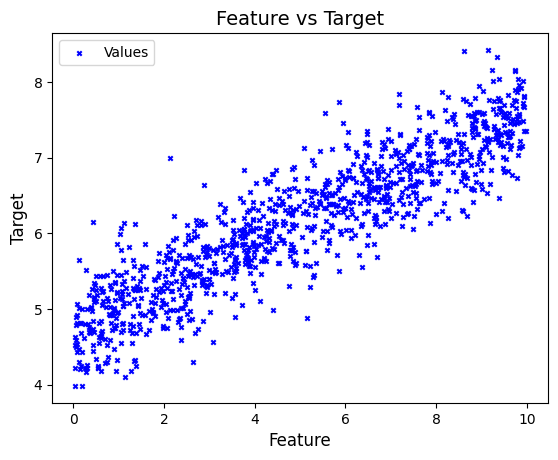

In [6]:
#Visualizing the relationship between the feature and the target variable
plt.scatter(training_data['feature'], training_data['target'], color='blue', marker='x', s=10, label='Values')
plt.title('Feature vs Target', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.legend()
plt.show()

The scatter plot clearly demonstrates a linear relationship between the target and feature variable, indicating that the linearity assumption is satisfied.

In the following three code blocks, I will apply the Ordinary Least Squares (OLS) method to calculate the slope and y-intercept of the regression line.

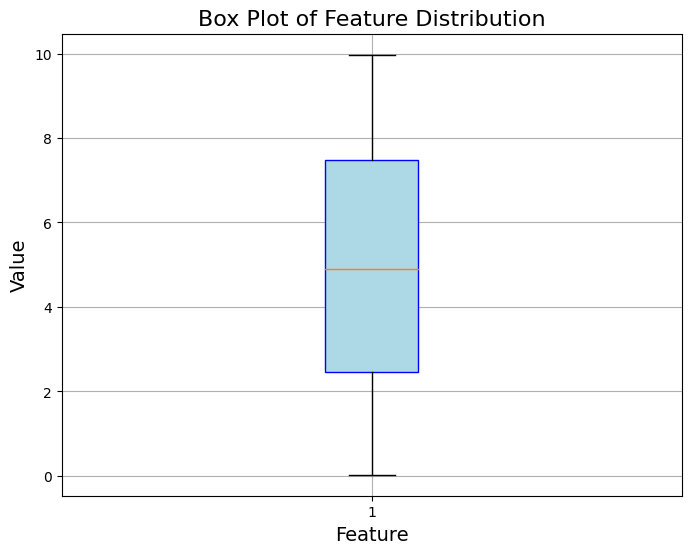

In [7]:
# Plotting the boxplot of the feature for outlier detection

# Figure size specification
plt.figure(figsize=(8, 6))

# Customizing colors for clarity
plt.boxplot(training_data['feature'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(marker='o', color='red', markersize=100))

# Adding titles and labels
plt.title("Box Plot of Feature Distribution", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Value", fontsize=14)

# # Adding gridlines for easier interpretation
plt.grid(True) 
plt.show()

**Code description for reference** <br>

* When patch_artist=True, the box will be filled with the color defined in the boxprops dictionary. If it's set to False, the box will not be filled with color (only borders will be drawn).

* **flierprops=dict():** This dictionary customizes the appearance of the outliers (the "fliers" in the boxplot).

In [8]:
# Start Time Measurement
start_time = time.time()

#Means of target & feature
target_mean=np.mean(training_data['target'])
feature_mean=np.mean(training_data['feature'])
print(f'Target Mean: {target_mean:.4f}')
print(f'Feature Mean: {feature_mean:.4f}')

# End measuring time
end_time = time.time()

# Print the time it took
print(f"Time taken: {(end_time - start_time):.5f} seconds")

Target Mean: 6.1575
Feature Mean: 4.9875
Time taken: 0.00180 seconds


In [9]:
#slope w calculation
numerator=np.sum((training_data['target']-target_mean)*(training_data['feature']-feature_mean))
denominator=np.sum((training_data['feature']-feature_mean)**2)
print(f'Covariance Between Target & Feature Value: {numerator:.4f}')
print(f'Variance of Feature: {denominator:.4f}')
w=numerator/denominator
print(f'Slope: {w}')

Covariance Between Target & Feature Value: 2570.3856
Variance of Feature: 9063.1363
Slope: 0.2836088374797466


**Covariance Between Target & Feature Value Interpretation** :<br>

* There is a positive linear relationship between the feature and target, meaning that as the feature increases, the target also tends to increase.<br>

* The feature has a wide spread around its mean, indicating significant variability in the feature values, which could help explain the target's variability.

In [10]:
#Intercept b calculation
b = target_mean-(w*feature_mean)
print(f'y-intercept Value: {b:.4f}')

y-intercept Value: 4.7430


**According to the OLS method**, the optimal values for the **y-intercept** and **slope** are represented by **4.743** and **0.284** respectively.<br>

**Interpretation of y-intercept and slope:** <br>
* The y-intercept represents the value of the target variable when the feature (independent variable) is zero. Essentially, it is the **point(4.743) where the regression line crosses the y-axis**.<br>

* A positive slope of 0.284 indicates a positive linear relationship between the feature and the target. For each **one-unit increase in the feature (independent variable), the target (dependent variable) is expected to increase by 0.284 units**.

In [11]:
#Predicted Value
training_feature = training_data['feature']
Predicted_Value = w*training_feature + b
#print(f'Predicted Value: {Predicted_Value}')

#Residual calculation
training_target = training_data['target']
Residual = training_target - Predicted_Value
#print(Residual)

#Print Feature, Target, Predicted, Residual
summary_df = pd.DataFrame({'Feature':training_feature, 'Target':training_target,'Predicted':Predicted_Value, 'Residual':Residual})
summary_df.head()

,Feature,Target,Predicted,Residual
0,2.981457,5.393127,5.588551,-0.195424
1,4.073529,5.842601,5.898272,-0.055671
2,9.272826,7.384454,7.372839,0.011615
3,0.705137,4.606203,4.942967,-0.336764
4,7.241643,6.553693,6.796777,-0.243084


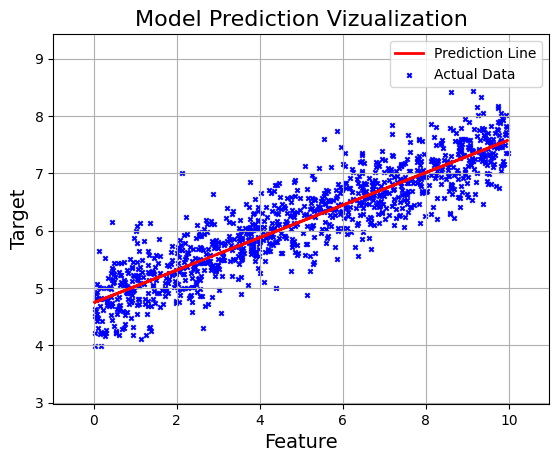

In [12]:
#Regression Line Viz.
plt.plot(training_feature, Predicted_Value, color='red', label='Prediction Line',  linewidth=2)
plt.scatter(training_data['feature'], training_data['target'], color='blue', marker='x',  s=10, label='Actual Data')
plt.title('Model Prediction Vizualization', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)

# Adding gridlines for better readability
plt.grid(True)

# Setting axis limits
plt.xlim(min(training_data['feature']) - 1, max(training_data['feature']) + 1)
plt.ylim(min(training_data['target']) - 1, max(training_data['target']) + 1)
plt.legend()
plt.show()

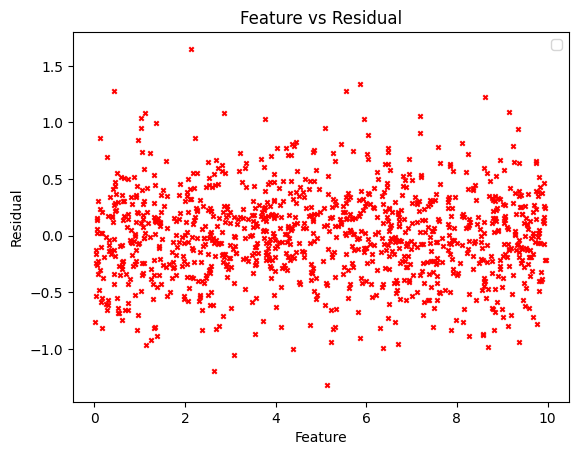

In [13]:
#Residual Plot to check Homoscedasticity Assumption
plt.scatter(training_data['feature'], Residual, marker='x', color='r', s=10)
plt.xlabel('Feature')
plt.ylabel('Residual')
plt.title('Feature vs Residual')
plt.legend()
plt.show()

As expected, the residual plot shows no discernible pattern, which typically indicates that the model provides a good fit to the data.

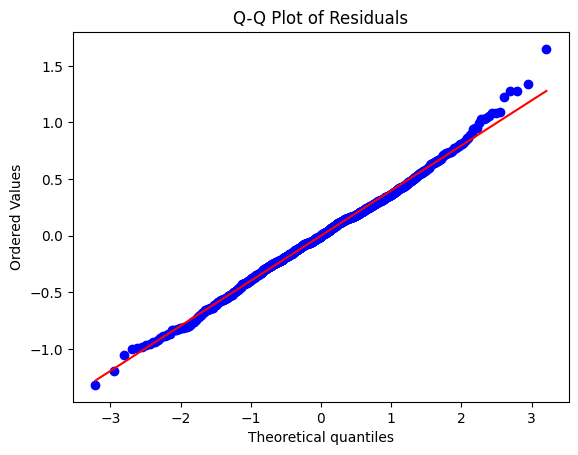

In [14]:
#Q-Q(Quantile-Quantile) plot to compare residual distribution to the normal distribution
import scipy.stats as stats
stats.probplot(Residual, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

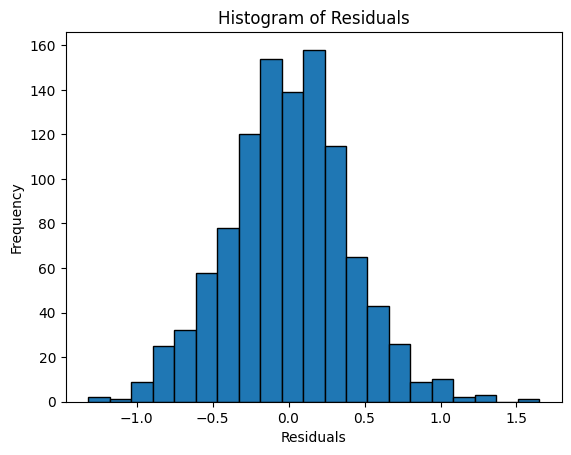

In [15]:
#Histogram of Residuals
plt.hist(Residual, bins=21, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [16]:
#Durbin-Watson test to check Independence of error
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_stat = durbin_watson(Residual)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.0395142523506404


A Durbin-Watson test value close to 2 suggests that the residuals are independent. A value slightly above 2 indicates a slight negative correlation among the residuals.

In [17]:
#Model Evaluation
ss_total = np.sum((training_data['target']-target_mean)**2)
ss_residual = np.sum(Residual**2)
r_squared = 1-(ss_residual/ss_total)

# Calculate Mean Squared Error (MSE)
mse = np.mean(Residual ** 2)

print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.81
Mean Squared Error (MSE): 0.16


* R-squared (0.81) indicates that 81% of the variance in the target variable is explained by the model.<br>
* Mean Squared Error (0.16) shows that, on average, the model's predictions deviate from the actual values by 0.16 units.

In [18]:
Testing_Data=pd.read_csv('/kaggle/input/wids-agent-jackie-assignment-1/test.csv')
Testing_Data.head()

,row_id,feature
0,0,1.160535
1,1,9.869024
2,2,5.611131
3,3,0.328108
4,4,8.794113


In [19]:
#Make Prediction
test_feature=Testing_Data['feature']
test_target = (w*Testing_Data['feature'])+b
test_prediction = pd.DataFrame({'row_id':Testing_Data['row_id'], 'prediction':test_target})
test_prediction.head()

,row_id,prediction
0,0,5.072121
1,1,7.541926
2,2,6.334350
3,3,4.836038
4,4,7.237072


In [20]:
my_submission=test_prediction
my_submission.to_csv('my_submission.csv', index=False)

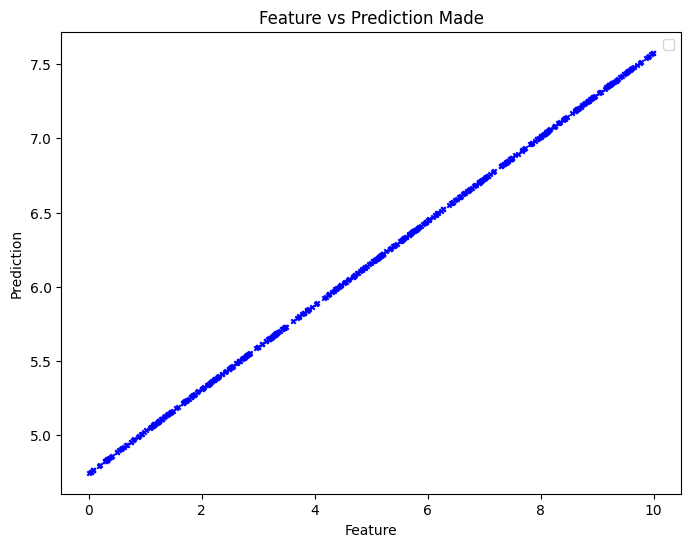

In [21]:
#Feature vs Prediction plot
plt.figure(figsize=(8,6))
plt.scatter(test_feature, test_target, marker='x', color='blue', s=10)
plt.xlabel('Feature')
plt.ylabel('Prediction')
plt.title('Feature vs Prediction Made')
plt.legend()
plt.show()

In [22]:
sample_submission=pd.read_csv('/kaggle/input/wids-agent-jackie-assignment-1/sample_submission.csv')
sample_submission.head()

,row_id,prediction
0,0,10.549902
1,1,10.373797
2,2,9.589034
3,3,10.369465
4,4,9.778381


In [23]:
print(my_submission)

     row_id  prediction
0         0    5.072121
1         1    7.541926
2         2    6.334350
3         3    4.836038
4         4    7.237072
..      ...         ...
445     445    5.215545
446     446    6.648277
447     447    5.672641
448     448    4.862159
449     449    5.227016

[450 rows x 2 columns]
